#### Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


import joblib
import os


In [51]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    
    # Predição nos dados de treino e validação
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Avaliação nos dados de treino e validação
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    # Calcular MAPE
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100
    
    # Resultado
    results = {
        'Model': model.__class__.__name__,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Train MSE': train_mse,
        'Val MSE': val_mse,
        'Train R²': train_r2,
        'Val R²': val_r2,
        'Train MAPE': train_mape,
        'Val MAPE': val_mape
    }
    
    return results

####  Análise Exploratória


In [35]:
train_df = pd.read_csv(r'C:\Users\User\Documents\Estudos Ciencia de dados\case\data\train_data.csv')
val_df = pd.read_csv(r'C:\Users\User\Documents\Estudos Ciencia de dados\case\data\val_data.csv')
test_df = pd.read_csv(r'C:\Users\User\Documents\Estudos Ciencia de dados\case\data\test_data.csv')

In [36]:
train_df['date'] = pd.to_datetime(train_df['date'])
val_df['date'] = pd.to_datetime(val_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [4]:
train_df

,appId,date,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss,target
0,82896,2024-01-18,0.113072,1,0.038107,0.669405,0.029986,0.600,0.196700,0.247513,22964.000
1,72653,2024-01-01,0.061111,1,0.082197,0.312115,0.129825,0.400,0.166613,0.054699,15223.000
2,94251,2024-05-31,0.133892,1,0.159708,0.340862,0.151417,0.375,0.265448,0.060370,56639.000
3,54019,2024-04-26,0.028717,4,0.005262,0.308008,0.002415,0.350,0.053381,0.205908,4192.000
4,50760,2024-02-10,0.096528,0,0.134800,0.349076,0.094779,0.350,0.043999,0.009641,29743.000
...,...,...,...,...,...,...,...,...,...,...,...
23633,88516,2024-01-15,0.008172,3,0.005565,0.312115,0.002577,0.350,0.093174,0.383616,1374.000
23634,85803,2024-07-23,0.039924,0,0.009333,0.320329,0.008096,0.350,0.015691,0.022942,6586.000
23635,36257,2024-03-26,1.000000,0,0.232722,0.603696,0.508353,1.000,1.000000,0.406197,346352.125
23636,80525,2024-02-02,0.119423,1,0.655637,0.266940,1.000000,0.225,0.123746,0.235500,12702.000


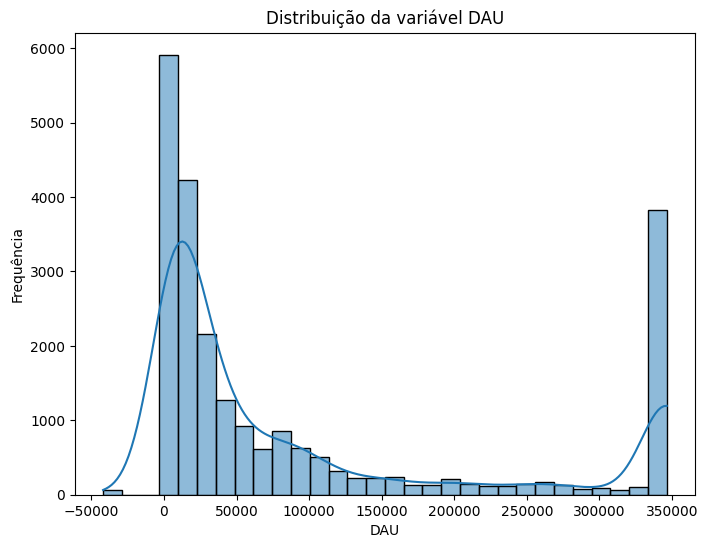

In [5]:
# Visualizando a distribuição da variável alvo (DAU)
plt.figure(figsize=(8, 6))
sns.histplot(train_df['target'], kde=True, bins=30)
plt.title('Distribuição da variável DAU')
plt.xlabel('DAU')
plt.ylabel('Frequência')
plt.show()

In [6]:
train_df.dtypes

appId                      int64
date              datetime64[ns]
mauReal                  float64
category                   int64
ratings                  float64
daily_ratings            float64
reviews                  float64
daily_reviews            float64
newinstalls              float64
predictionLoss           float64
target                   float64
dtype: object

In [7]:
train_df

,appId,date,mauReal,category,ratings,daily_ratings,reviews,daily_reviews,newinstalls,predictionLoss,target
0,82896,2024-01-18,0.113072,1,0.038107,0.669405,0.029986,0.600,0.196700,0.247513,22964.000
1,72653,2024-01-01,0.061111,1,0.082197,0.312115,0.129825,0.400,0.166613,0.054699,15223.000
2,94251,2024-05-31,0.133892,1,0.159708,0.340862,0.151417,0.375,0.265448,0.060370,56639.000
3,54019,2024-04-26,0.028717,4,0.005262,0.308008,0.002415,0.350,0.053381,0.205908,4192.000
4,50760,2024-02-10,0.096528,0,0.134800,0.349076,0.094779,0.350,0.043999,0.009641,29743.000
...,...,...,...,...,...,...,...,...,...,...,...
23633,88516,2024-01-15,0.008172,3,0.005565,0.312115,0.002577,0.350,0.093174,0.383616,1374.000
23634,85803,2024-07-23,0.039924,0,0.009333,0.320329,0.008096,0.350,0.015691,0.022942,6586.000
23635,36257,2024-03-26,1.000000,0,0.232722,0.603696,0.508353,1.000,1.000000,0.406197,346352.125
23636,80525,2024-02-02,0.119423,1,0.655637,0.266940,1.000000,0.225,0.123746,0.235500,12702.000


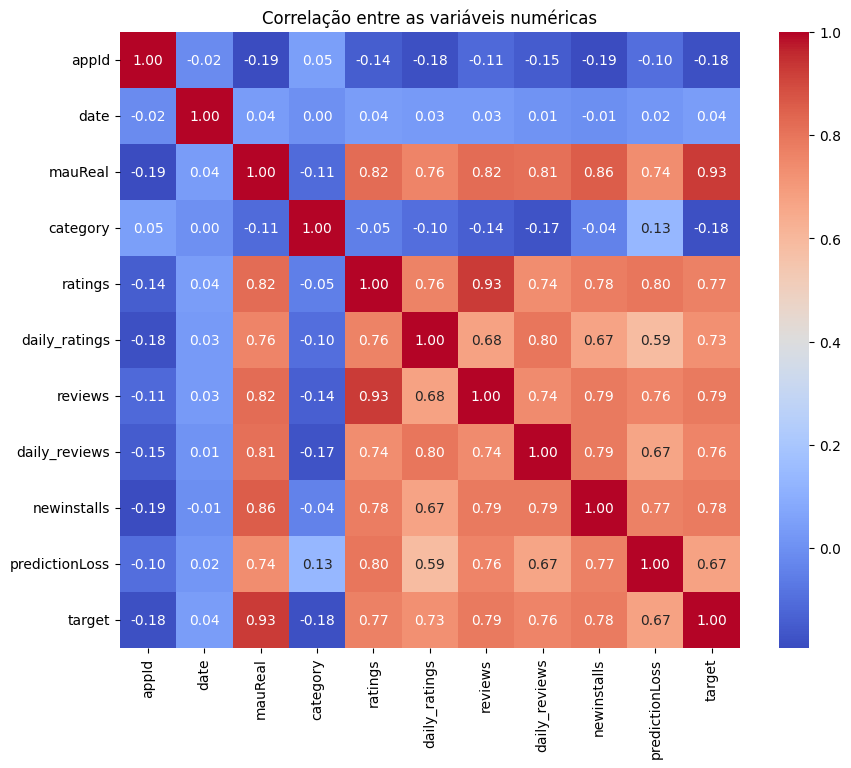

In [8]:
# Verificando a correlação entre as variáveis numéricas
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as variáveis numéricas')
plt.show()

#### Preparação dos Dados para Modelagem

In [39]:
# Extraindo novas variáveis a partir de 'date'
for df in [train_df, val_df, test_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['week_of_year'] = df['date'].dt.isocalendar().week     
    df['installs_weekday'] = df['newinstalls'] * df['day_of_week']

In [40]:
# Remover a coluna 'date' original, pois agora temos variáveis extraídas
train_df.drop(columns=['date'], inplace=True)
val_df.drop(columns=['date'], inplace=True)
test_df.drop(columns=['date'], inplace=True)


In [41]:
# Separando variáveis preditoras (X) e alvo (y)
X_train = train_df.drop(columns=['target'])  # Remover o target 
y_train = train_df['target']


X_val = val_df.drop(columns=['target'])
y_val = val_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

#### Criar e Testar os Modelos

In [42]:
# Listando os modelos a serem testados
models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    DecisionTreeRegressor(random_state=42),
    LinearRegression(),
    CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, random_state=42, verbose=0),
    xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42),
    lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)
]

In [52]:
# Avaliando os modelos
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val)
    results.append(result)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 23638, number of used features: 14
[LightGBM] [Info] Start training from score 98773.636096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [53]:
# Convertendo os resultados para DataFrame para visualização
results_df = pd.DataFrame(results)
results_df

,Model,Train MAE,Val MAE,Train MSE,Val MSE,Train R²,Val R²,Train MAPE,Val MAPE
0,RandomForestRegressor,1478.863134,3966.078346,2.807880e+07,1.878280e+08,0.998218,0.988295,4.993506,9.362393
1,DecisionTreeRegressor,0.000000,4857.314875,0.000000e+00,3.684842e+08,1.000000,0.977036,0.000000,10.251383
2,LinearRegression,25538.308543,24758.777358,1.957538e+09,1.860193e+09,0.875786,0.884073,130.564638,125.497505
3,CatBoostRegressor,4025.914413,5078.608439,7.222215e+07,1.378246e+08,0.995417,0.991411,18.633720,20.414289
4,XGBRegressor,1481.420690,4390.925922,7.203172e+06,1.836372e+08,0.999543,0.988556,7.495024,15.471302
5,LGBMRegressor,3135.885266,4991.400238,5.086352e+07,1.457408e+08,0.996772,0.990917,20.270848,25.805696


Conclusões:
- RandomForestRegressor:

Este modelo apresenta o menor MAE e menor MAPE na validação, indicando um erro menor e maior precisão nas previsões, sendo o melhor modelo considerando essas métricas.

- DecisionTreeRegressor:

Embora tenha um MAE de 0 no treinamento (indicando que se ajustou perfeitamente aos dados de treinamento), ele sofre um overfitting evidente, com um MAE muito maior na validação (4857). Além disso, o MAPE na validação é significativo (10.25%).

- LinearRegression:

O modelo de regressão linear apresenta altos valores de MAE e MAPE, além de um R² muito baixo, indicando que não está modelando bem a relação entre as variáveis.

- CatBoostRegressor, XGBRegressor, LGBMRegressor:

Embora esses modelos também apresentem bom desempenho, o RandomForestRegressor se destaca em termos de MAE e MAPE, com o XGBRegressor sendo o segundo melhor, mas com um MAPE considerável.

RandomForestRegressor é o melhor modelo  com o menor erro absoluto (MAE) e o melhor desempenho percentual (MAPE) na validação. Ele também tem um R² muito alto, indicando boa explicação da variância nos dados

#### otimizando o melhor modelo 

In [56]:
# Definir os parâmetros que serão testados
param_grid = {
    'n_estimators': [100, 200, 500],  # Número de árvores na floresta
    'max_depth': [ 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras em um nó folha
    'max_features': ['auto', 'sqrt'],  # Número máximo de recursos a considerar em cada divisão
    'bootstrap': [True, False]  # Se as amostras serão com reposição ou não
}

# Definindo o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustando o modelo
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=2)

In [59]:
# Resultados da busca de hiperparâmetros
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [60]:
print(f"Melhores parâmetros encontrados: {best_params}")


Melhores parâmetros encontrados: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [62]:
# Avaliação do modelo otimizado
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_val)

# Cálculo das métricas para o modelo otimizado
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
val_mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

In [63]:
# Exibindo os resultados
print(f"Treinamento - MAE: {train_mae}, MSE: {train_mse}, R²: {train_r2}, MAPE: {train_mape}%")
print(f"Validação - MAE: {val_mae}, MSE: {val_mse}, R²: {val_r2}, MAPE: {val_mape}%")

Treinamento - MAE: 3.35070662052504, MSE: 79.39276305029514, R²: 0.9999999949621968, MAPE: 0.029242068400943247%
Validação - MAE: 4060.39730924626, MSE: 142980527.94219318, R²: 0.9910894377536802, MAPE: 11.548042666820935%


#### Treinando com os melhores parâmetros

In [64]:
# Treinar novamente o modelo com os melhores hiperparâmetros
final_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Treinando o modelo no conjunto de treinamento completo
final_rf_model.fit(X_train, y_train)

# Avaliar no conjunto de validação
y_val_pred = final_rf_model.predict(X_val)


In [65]:
# Métricas finais no conjunto de validação

final_metrics = {
    "MAE": mean_absolute_error(y_val, y_val_pred),
    "MSE": mean_squared_error(y_val, y_val_pred),
    "R²": r2_score(y_val, y_val_pred),
    "MAPE": mean_absolute_percentage_error(y_val, y_val_pred)
}

print("Métricas finais no conjunto de validação:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

Métricas finais no conjunto de validação:
MAE: 4476.8664
MSE: 155309702.4780
R²: 0.9903
MAPE: 0.1364


#### Salvando o modelo

In [ ]:
# Criar a pasta 'models' se não existir
os.makedirs("models", exist_ok=True)

# Caminho para salvar o modelo
final_model_path = "models/final_random_forest_model.pkl"

# Salvar o modelo
joblib.dump(final_rf_model, final_model_path)

print(f"Modelo final salvo em: {final_model_path}")

Modelo final salvo em: models/final_random_forest_model.pkl


In [68]:
# Carregar o modelo salvo
loaded_final_model = joblib.load(final_model_path)

# Fazer predições para verificar integridade
test_preds = loaded_final_model.predict(X_val[:5])
print("Predições de teste com o modelo carregado:", test_preds)

Predições de teste com o modelo carregado: [ 12684.89693333   9157.892      346352.125      241743.89475
 346352.125     ]


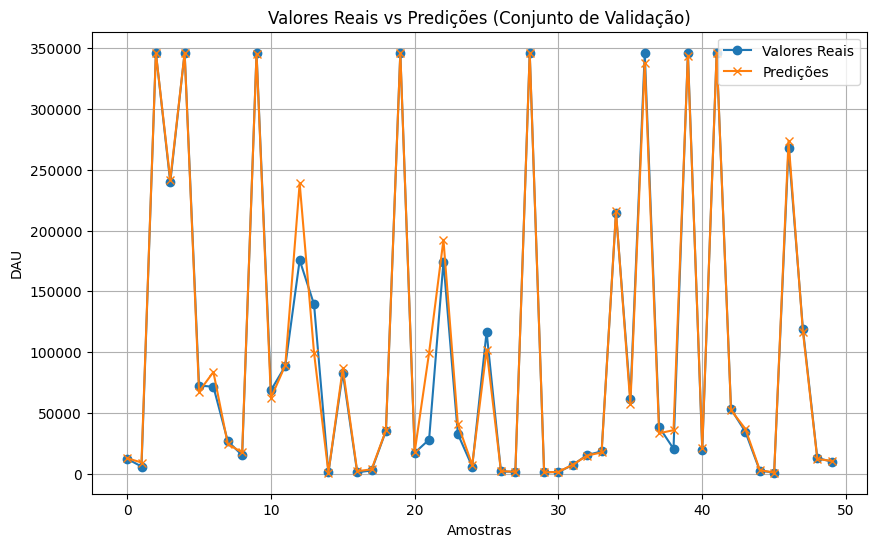

In [69]:
# Comparar valores reais e previstos
plt.figure(figsize=(10, 6))
plt.plot(y_val.values[:50], label="Valores Reais", marker="o")
plt.plot(y_val_pred[:50], label="Predições", marker="x")
plt.legend()
plt.title("Valores Reais vs Predições (Conjunto de Validação)")
plt.xlabel("Amostras")
plt.ylabel("DAU")
plt.grid()
plt.show()